<a href="https://colab.research.google.com/github/Igvhore/AI_test/blob/main/AIKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)	Работа с библиотекой numpy. Создайте вектор целых чисел от 0 до 9 включительно длиной 20 чисел. Найти наиболее часто встречающееся значение в массиве и выведите его.

In [66]:
import numpy as np

In [7]:
vector = np.array([0,3,5,3,7,3,6,9,7,3,4,2,1,4,4,6,7,2,8,0])
unique, counts = np.unique(vector, return_counts=True)
print(unique[np.argmax(counts)])

3


2)	Работа с библиотекой Pandas. Загрузить файл ‘EcommercePurchases'  - электронные покупки.
*   Сколько человек имеют должность «Lawyer»
*   Сколько человек имеют AmericanExpress в качестве поставщика кредитных карт (CC Provider) и совершили покупку выше $95 (PurchasePrice)



In [9]:
import pandas as pd

In [30]:
purchases = pd.read_csv('Ecommerce Purchases.csv', delimiter=',')

In [34]:
print (len(purchases[purchases.Job == 'Lawyer']))

30


In [53]:
print(len(purchases[(purchases['CC Provider'] == 'American Express') & (purchases['Purchase Price'] > 95)]))

39


3) Даны 6 точек и отрезок от 1 до 100. Построить график функции:

*   проходящий через все точки
*   график двух функций: первая парабола через первые 3 точки, вторая парабола через следующие 3 точки


In [57]:
import matplotlib.pyplot as plt

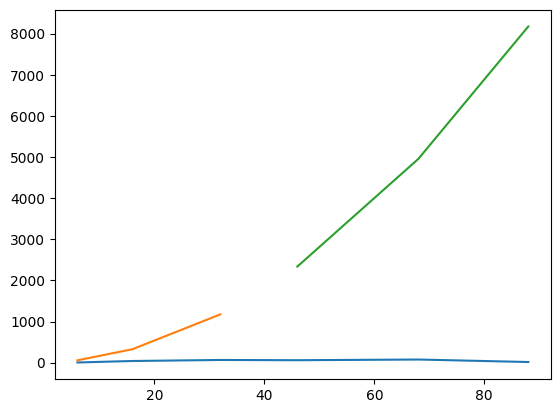

In [85]:
X = np.random.randint(1,101,6)
Y = np.random.randint(1,101,6)

X.sort()

plt.plot(X, Y)

X_first = X[:3]

Y = X_first ** 2 + 5 * X_first - 10
plt.plot(X_first, Y)

X_second = X[3:]

Y = X_second ** 2 + 5 * X_second - 10
plt.plot(X_second, Y)

Задача: Используя данные о заболеваемости раком груди, постройте модель KNN для предсказания, является ли новая образцы раковым или нет.

Набор данных: "Breast Cancer Wisconsin (Diagnostic) Data Set" из репозитория UCI Machine Learning


In [87]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.6-py3-none-any.whl (8.0 kB)


In [99]:
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Размер обучающего набора:", len(X_train))
print("Размер тестового набора:", len(X_test))

Размер обучающего набора: 455
Размер тестового набора: 114


In [101]:
knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Точность на тестовом наборе данных: ", accuracy)

Точность на тестовом наборе данных:  0.9385964912280702


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(95.72222222222221, 0.5, 'Actual')

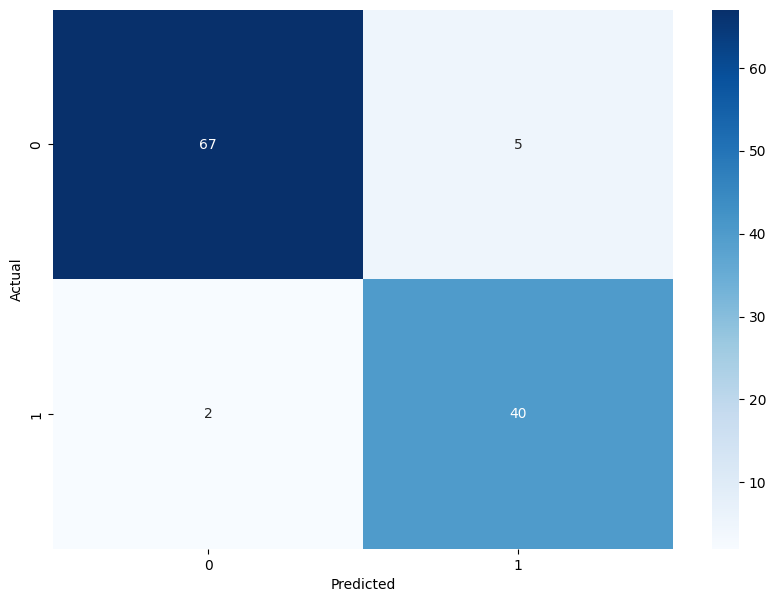

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')